# Ridge regressor, numerical only

In [1]:
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import RepeatedKFold

from IPython.display import clear_output

from ridgeReg import RidgeReg

In [2]:
# load dataset
df = pd.read_csv("dataset.csv", index_col=0)
df["explicit"] = df["explicit"].astype(int)
df

,track_id,artists,album_name,track_name,popularity,duration_ms,explicit,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,time_signature,track_genre
n,,,,,,,,,,,,,,,,,,,,
0,5SuOikwiRyPMVoIQDJUgSV,Gen Hoshino,Comedy,Comedy,73,230666,0,0.676,0.4610,1,-6.746,0,0.1430,0.0322,0.000001,0.3580,0.7150,87.917,4,acoustic
1,4qPNDBW1i3p13qLCt0Ki3A,Ben Woodward,Ghost (Acoustic),Ghost - Acoustic,55,149610,0,0.420,0.1660,1,-17.235,1,0.0763,0.9240,0.000006,0.1010,0.2670,77.489,4,acoustic
2,1iJBSr7s7jYXzM8EGcbK5b,Ingrid Michaelson;ZAYN,To Begin Again,To Begin Again,57,210826,0,0.438,0.3590,0,-9.734,1,0.0557,0.2100,0.000000,0.1170,0.1200,76.332,4,acoustic
3,6lfxq3CG4xtTiEg7opyCyx,Kina Grannis,Crazy Rich Asians (Original Motion Picture Sou...,Can't Help Falling In Love,71,201933,0,0.266,0.0596,0,-18.515,1,0.0363,0.9050,0.000071,0.1320,0.1430,181.740,3,acoustic
4,5vjLSffimiIP26QG5WcN2K,Chord Overstreet,Hold On,Hold On,82,198853,0,0.618,0.4430,2,-9.681,1,0.0526,0.4690,0.000000,0.0829,0.1670,119.949,4,acoustic
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
113995,2C3TZjDRiAzdyViavDJ217,Rainy Lullaby,#mindfulness - Soft Rain for Mindful Meditatio...,Sleep My Little Boy,21,384999,0,0.172,0.2350,5,-16.393,1,0.0422,0.6400,0.928000,0.0863,0.0339,125.995,5,world-music
113996,1hIz5L4IB9hN3WRYPOCGPw,Rainy Lullaby,#mindfulness - Soft Rain for Mindful Meditatio...,Water Into Light,22,385000,0,0.174,0.1170,0,-18.318,0,0.0401,0.9940,0.976000,0.1050,0.0350,85.239,4,world-music
113997,6x8ZfSoqDjuNa5SVP5QjvX,Cesária Evora,Best Of,Miss Perfumado,22,271466,0,0.629,0.3290,0,-10.895,0,0.0420,0.8670,0.000000,0.0839,0.7430,132.378,4,world-music


In [3]:
# keep only numerical features
# keep also track_id to find the duplicates
col_list_numerical = ['track_id','duration_ms','explicit','danceability','energy','key','loudness','mode','speechiness','acousticness','instrumentalness','liveness','valence','tempo','time_signature','popularity']
print(len(col_list_numerical))
df_num = df[col_list_numerical]
df_num

16


,track_id,duration_ms,explicit,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,time_signature,popularity
n,,,,,,,,,,,,,,,,
0,5SuOikwiRyPMVoIQDJUgSV,230666,0,0.676,0.4610,1,-6.746,0,0.1430,0.0322,0.000001,0.3580,0.7150,87.917,4,73
1,4qPNDBW1i3p13qLCt0Ki3A,149610,0,0.420,0.1660,1,-17.235,1,0.0763,0.9240,0.000006,0.1010,0.2670,77.489,4,55
2,1iJBSr7s7jYXzM8EGcbK5b,210826,0,0.438,0.3590,0,-9.734,1,0.0557,0.2100,0.000000,0.1170,0.1200,76.332,4,57
3,6lfxq3CG4xtTiEg7opyCyx,201933,0,0.266,0.0596,0,-18.515,1,0.0363,0.9050,0.000071,0.1320,0.1430,181.740,3,71
4,5vjLSffimiIP26QG5WcN2K,198853,0,0.618,0.4430,2,-9.681,1,0.0526,0.4690,0.000000,0.0829,0.1670,119.949,4,82
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
113995,2C3TZjDRiAzdyViavDJ217,384999,0,0.172,0.2350,5,-16.393,1,0.0422,0.6400,0.928000,0.0863,0.0339,125.995,5,21
113996,1hIz5L4IB9hN3WRYPOCGPw,385000,0,0.174,0.1170,0,-18.318,0,0.0401,0.9940,0.976000,0.1050,0.0350,85.239,4,22
113997,6x8ZfSoqDjuNa5SVP5QjvX,271466,0,0.629,0.3290,0,-10.895,0,0.0420,0.8670,0.000000,0.0839,0.7430,132.378,4,22


In [4]:
# handle duplicates: keep average of popularity for multiple ids
#group by track_id
grouped = df_num.groupby(by='track_id')
# calculate mean of popularity for entries with same track_id
fixed = grouped.agg({"popularity":"mean"})
# drop duplicates entries with same track_id
df_dropped = df_num.drop_duplicates(subset=['track_id'])
# sort df by track_id
df_num = df_dropped.set_index('track_id')
# set popularity as the popularity calculated by averaging
df_num['popularity'] = fixed['popularity']
df_num

,duration_ms,explicit,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,time_signature,popularity
track_id,,,,,,,,,,,,,,,
5SuOikwiRyPMVoIQDJUgSV,230666,0,0.676,0.4610,1,-6.746,0,0.1430,0.0322,0.000001,0.3580,0.7150,87.917,4,73.0
4qPNDBW1i3p13qLCt0Ki3A,149610,0,0.420,0.1660,1,-17.235,1,0.0763,0.9240,0.000006,0.1010,0.2670,77.489,4,55.0
1iJBSr7s7jYXzM8EGcbK5b,210826,0,0.438,0.3590,0,-9.734,1,0.0557,0.2100,0.000000,0.1170,0.1200,76.332,4,57.0
6lfxq3CG4xtTiEg7opyCyx,201933,0,0.266,0.0596,0,-18.515,1,0.0363,0.9050,0.000071,0.1320,0.1430,181.740,3,71.0
5vjLSffimiIP26QG5WcN2K,198853,0,0.618,0.4430,2,-9.681,1,0.0526,0.4690,0.000000,0.0829,0.1670,119.949,4,82.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2C3TZjDRiAzdyViavDJ217,384999,0,0.172,0.2350,5,-16.393,1,0.0422,0.6400,0.928000,0.0863,0.0339,125.995,5,21.0
1hIz5L4IB9hN3WRYPOCGPw,385000,0,0.174,0.1170,0,-18.318,0,0.0401,0.9940,0.976000,0.1050,0.0350,85.239,4,22.0
6x8ZfSoqDjuNa5SVP5QjvX,271466,0,0.629,0.3290,0,-10.895,0,0.0420,0.8670,0.000000,0.0839,0.7430,132.378,4,22.0


In [5]:
#separate dataset in X and y
X = df_num.drop('popularity',axis=1)
y = df_num['popularity']

In [6]:
# define function that will run the test
def runKFold(model,name):
  # start k fold
  kfold = RepeatedKFold(random_state=1,n_repeats=5,n_splits=5)
  train_scores = []
  test_scores = []
  train_mses = []
  test_mses = []
  for (train_index, test_index) in kfold.split(X):
    # separate data in train and test
    X_train = X.iloc[train_index]
    y_train = y.iloc[train_index]
    X_test = X.iloc[test_index]
    y_test = y.iloc[test_index]
    
    # train scaler on train data and apply it to both train and test data
    scaler = StandardScaler()
    scaler.fit(X_train)
    X_train_scaled = pd.DataFrame(scaler.transform(X_train),columns=X_train.columns)
    X_test_scaled = pd.DataFrame(scaler.transform(X_test),columns=X_test.columns)

    # train model
    model.fit(X_train_scaled,y_train)

    # predict values for popularity for both train and test set
    train_pred = model.predict(X_train_scaled)
    test_pred = model.predict(X_test_scaled)
    # print([(x,y) for (x,y) in zip(y_test,pred)])
    # calculate scores
    train_score = model.r2_score(y_train, train_pred)
    test_score = model.r2_score(y_test, test_pred)
    train_mse = model.mse(y_train,train_pred)
    test_mse = model.mse(y_test,test_pred)
    
    train_scores.append(train_score)
    test_scores.append(test_score)
    train_mses.append(train_mse)
    test_mses.append(test_mse)
    print((train_score,test_score))
    print((train_mse,test_mse))
  
  clear_output(wait=False)
  # calculate average of scores
  mean_train_score = sum(train_scores)/len(train_scores)
  mean_test_score = sum(test_scores)/len(test_scores)
  mean_train_mse = sum(train_mses)/len(train_mses)
  mean_test_mse = sum(test_mses)/len(test_mses)
  print(f"Average {name} R2 train score: {mean_train_score}")
  print(f"Average {name} R2 test score: {mean_test_score}")
  print(f"Average {name} MSE train: {mean_train_mse}")
  print(f"Average {name} MSE test: {mean_test_mse}")
  return mean_train_score, mean_test_score, mean_train_mse, mean_test_mse

In [7]:
# run ridge regressor
# use repeated k-fold to get a better estimate of the values
r2_train_scores = []
r2_test_scores = []
mse_train = []
mse_test = []
alphas = [0,2,4,8,10,100,1000]
for alpha in alphas:
  res = runKFold(RidgeReg(alpha),f"Alpha{alpha}")
  r2_train_scores.append(res[0])
  r2_test_scores.append(res[1])
  mse_train.append(res[2])
  mse_test.append(res[3])
print(r2_test_scores)

Average Alpha1000 R2 train score: 0.03348621610031712
Average Alpha1000 R2 test score: 0.033070678950767006
Average Alpha1000 MSE train: 409.16740018248316
Average Alpha1000 MSE test: 409.3330921159152
[0.03356934653313325, 0.033569361654920686, 0.033569372601158005, 0.033569381969885057, 0.03356938039382448, 0.03356500175557505, 0.033070678950767006]


In [8]:
max(enumerate(r2_test_scores),key=lambda x: x[1])[0]

'{0:.10f}'.format(r2_test_scores[3]-r2_test_scores[0])

'0.0000000354'

In [9]:
# run ridge regressor
# use repeated k-fold to get a better estimate of the values
r2_train_scores = []
r2_test_scores = []
mse_train = []
mse_test = []
alphas = [0,2,4,8,12,14,16]
for alpha in alphas:
  res = runKFold(RidgeReg(alpha),f"Alpha{alpha}")
  r2_train_scores.append(res[0])
  r2_test_scores.append(res[1])
  mse_train.append(res[2])
  mse_test.append(res[3])


Average Alpha16 R2 train score: 0.03399297432428674
Average Alpha16 R2 test score: 0.033569350632642235
Average Alpha16 MSE train: 408.95286828910963
Average Alpha16 MSE test: 409.1221286174513


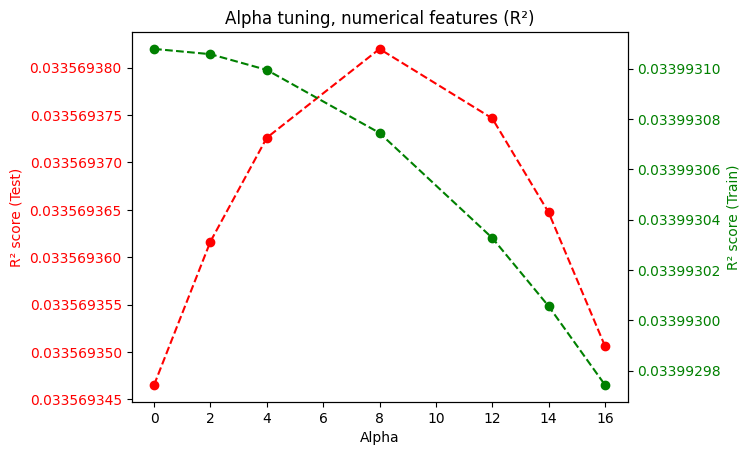

In [18]:
import matplotlib.pyplot as plt
x = alphas
y_train = r2_train_scores
y_test = r2_test_scores
#plt.plot(x,y_train)
fig,ax = plt.subplots()
ax.plot(x,y_test,linestyle='--',marker='o',color='red')
ax.set_title("Alpha tuning, numerical features (R²)")
ax.set_ylabel("R² score (Test)",color='red')
ax.tick_params(axis='y',labelcolor='red')
ax.set_xlabel("Alpha")
ax2 = ax.twinx()
ax2.plot(x,y_train,linestyle='--',marker='o',color='green')
ax2.set_ylabel("R² score (Train)",color='green')
ax2.tick_params(axis='y',labelcolor='green')
ax.ticklabel_format(useOffset=False)
ax2.ticklabel_format(useOffset=False)
plt.show()

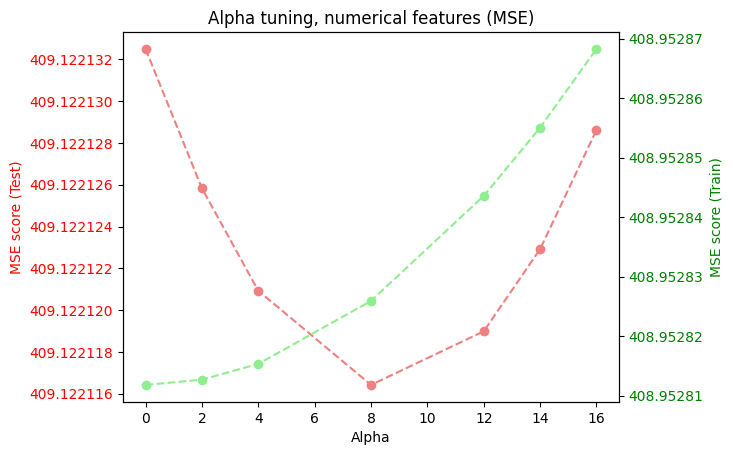

In [22]:
import matplotlib.pyplot as plt
x = alphas
y_train = mse_train
y_test = mse_test
#plt.plot(x,y_train)
fig,ax = plt.subplots()
ax.plot(x,y_test,linestyle='--',marker='o',color='lightcoral')
ax.set_title("Alpha tuning, numerical features (MSE)")
ax.set_ylabel("MSE score (Test)",color='red')
ax.tick_params(axis='y',labelcolor='red')
ax.set_xlabel("Alpha")
ax2 = ax.twinx()
ax2.plot(x,y_train,linestyle='--',marker='o',color='lightgreen')
ax2.set_ylabel("MSE score (Train)",color='green')
ax2.tick_params(axis='y',labelcolor='green')
ax.ticklabel_format(useOffset=False)
ax2.ticklabel_format(useOffset=False)
plt.show()

In [12]:
max(enumerate(r2_test_scores),key=lambda x: x[1])[0]

'{0:.10f}'.format(r2_test_scores[3]-r2_test_scores[0])

'0.0000000354'

In [13]:
""" import matplotlib.pyplot as plt
x = alphas
y_train = r2_train_scores
y_test = r2_test_scores
#plt.plot(x,y_train)
fig,ax = plt.subplots()
ax.plot(x,y_test,linestyle='--',marker='o',color='red')
ax.set_title("Alpha tuning, all features (1)")
ax.set_ylabel("R² score (Test)")
ax.set_xlabel("Alpha")
plt.show()
fig,ax = plt.subplots()
ax.plot(x,y_train,linestyle='--',marker='o',color='green')
ax.set_title("Alpha tuning, all features (1)")
ax.set_ylabel("R² score (Train)")
ax.set_xlabel("Alpha")
plt.show() """

' import matplotlib.pyplot as plt\nx = alphas\ny_train = r2_train_scores\ny_test = r2_test_scores\n#plt.plot(x,y_train)\nfig,ax = plt.subplots()\nax.plot(x,y_test,linestyle=\'--\',marker=\'o\',color=\'red\')\nax.set_title("Alpha tuning, all features (1)")\nax.set_ylabel("R² score (Test)")\nax.set_xlabel("Alpha")\nplt.show()\nfig,ax = plt.subplots()\nax.plot(x,y_train,linestyle=\'--\',marker=\'o\',color=\'green\')\nax.set_title("Alpha tuning, all features (1)")\nax.set_ylabel("R² score (Train)")\nax.set_xlabel("Alpha")\nplt.show() '